<a href="https://colab.research.google.com/github/Renata-Romanelli/ML_stroke_prediction/blob/main/Principal_Component_Analysis_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Principal Component Analysis (PCA)**

Is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.

PCA is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.

The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables.


1. Standardize the dataset to ensure that each variable has a mean of 0 and a standand deviation of 1.

2. Covariance matrix computation. Covariance measures the strenght of joint variability between two or more variables, indicating how much they change in relatio to each other.

3. Eigenvalues and Eigenvectors to Identify Principal Components.


In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('resultados_DOS - Acc1.csv', sep=';')

#Create dataset with the target variables encoded
df_encoded = pd.get_dummies(data=df, columns=['Status'])
df_encoded.head()

,Paciente,centro,Hemisferio,Stroke Type,GanhoVLF,GanhoLF,GanhoHF,FaseVLF,FaseLF,FaseHF,...,CohLF,CohHF,ARI,ARI_ARMA,nMx,acceptance,Unnamed: 18,Status_Affected,Status_Control,Status_Unnafected
0,VOL01,BR,E,Control,0.913,1.479,1.325,1.088,0.100,-0.124,...,0.630,0.505,6.470,5.06,0.4511,1,NaN,0,1,0
1,NaN,BR,D,Control,0.442,1.418,1.797,0.761,0.863,0.330,...,0.792,0.570,7.454,5.72,0.3122,1,NaN,0,1,0
2,VOL02,BR,E,Control,0.627,1.788,1.451,0.937,1.071,-0.223,...,0.772,0.658,7.960,7.11,0.1172,1,NaN,0,1,0
3,NaN,BR,D,Control,0.787,2.228,1.835,0.937,1.070,-0.206,...,0.770,0.657,7.950,7.48,0.0140,1,NaN,0,1,0
4,VOL03,BR,E,Control,0.719,1.031,1.326,0.392,0.760,-0.097,...,0.565,0.754,3.971,3.17,0.5492,1,NaN,0,1,0


Target variable: Status_Control

In [1]:
# X is a dataframe of features
X = df[['GanhoVLF','GanhoLF', 'GanhoHF', 'FaseVLF', 'FaseLF', 'FaseHF', 'CohVLF', 'CohLF',
       'CohHF', 'ARI', 'ARI_ARMA', 'nMx']]

print('Inputs Dataframe shape   :', X.shape)

Inputs Dataframe shape   : (158, 12)


In [29]:
# Standardize the data

X_mean = X.mean()
X_std = X.std()

Z = (X - X_mean) / X_std

The covariance matrix helps us visualize how strong the dependency of two features with each other in the feature space.

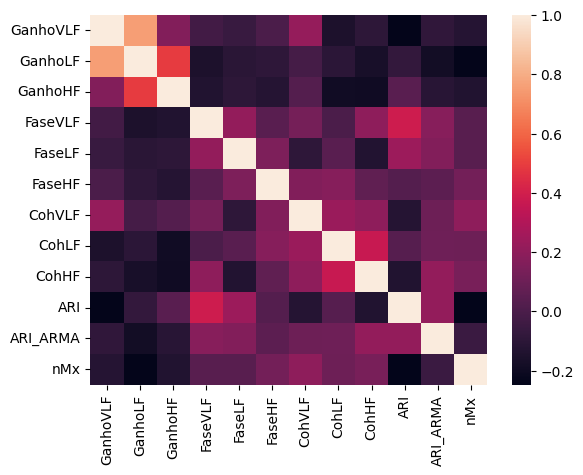

In [3]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

 Eigenvectors and eigenvalues for our feature space to identify the principal components for our feature space.

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.46274948 1.7718773  1.51555915 0.11051356 0.34007013 1.14361389
 0.52800876 0.98211594 0.67180482 0.88739474 0.81608903 0.77020319]
Eigen values Shape: (12,)
Eigen Vector Shape: (12, 12)


In [5]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

Explained variance: amount of the total variance which has been retained by selecting the principal components instead of the original feature space.

In [6]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.20522912, 0.35288557, 0.47918216, 0.57448332, 0.65632631,
       0.73027588, 0.79828329, 0.86246689, 0.91845063, 0.96245136,
       0.99079054, 1.        ])

**Determine the Number of Principal Components**

Here we can either consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance more than equal to 50%.

In [7]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

4

**Project the Data onto the Selected Principal Components**

- Find the projection matrix, It is a matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. it projects the high-dimensional dataset onto a lower-dimensional subspace

- The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components.

In [12]:
feature_names = X.columns.tolist()

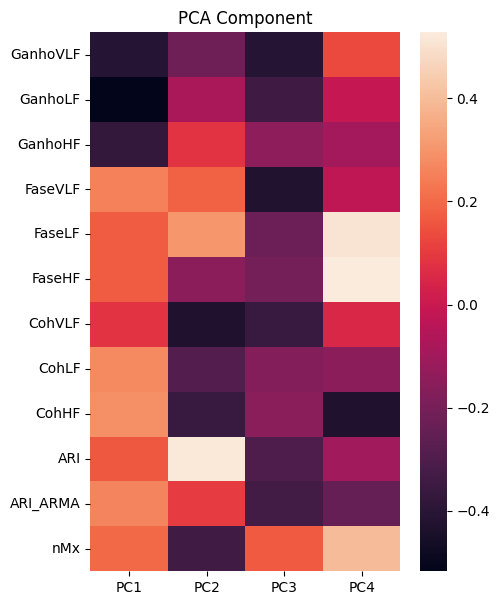

In [14]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = feature_names,
                             columns = ['PC1','PC2','PC3','PC4']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.

The resulting heatmap visualizes the relationship between the principal components (PC1, PC2, PC3, PC4) and the features of the dataset. Each colored cell in the heatmap represents the intensity of this relationship. Higher or lower values indicate a stronger correlation between the principal component and the corresponding feature. This visualization can help identify which features have a greater influence on the principal components and understand the data structure in relation to the original features.

In [33]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component

Z_pca = pd.DataFrame(Z_pca.values,
                     columns = ['PCA1','PCA2','PCA3','PCA4']
                            )
Z_pca.head()

,PCA1,PCA2,PCA3,PCA4
0,-0.051252,0.387836,0.379784,-0.414535
1,1.058667,0.786570,-0.640690,0.871163
2,0.745441,2.381580,-0.228705,-0.573993
3,0.550966,1.861759,-1.032608,-0.632000
4,0.220356,-0.000914,1.240651,0.381133


The output will be a DataFrame named Z_pca, where each column represents a principal component (PCA1, PCA2, PCA3, PCA4), and each row corresponds to a sample from the original dataset Z. The cells of the DataFrame will contain the values resulting from the matrix multiplication of Z and pca_component, that is, the values transformed into the principal components obtained by PCA.

Visualizing the first few rows of the Z_pca DataFrame will provide a sample of the data transformed into the principal components and allow observation of how the samples are distributed across the different principal components. This can help understand the new representation of the data after dimensionality reduction through PCA.

# Do PCA with sklearn package

In [16]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 4
pca = PCA(n_components=4)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
df_pca1.head()

,PC1,PC2,PC3,PC4
0,0.051252,-0.387836,-0.379784,0.414535
1,-1.058667,-0.786570,0.640690,-0.871163
2,-0.745441,-2.381580,0.228705,0.573993
3,-0.550966,-1.861759,1.032608,0.632000
4,-0.220356,0.000914,-1.240651,-0.381133


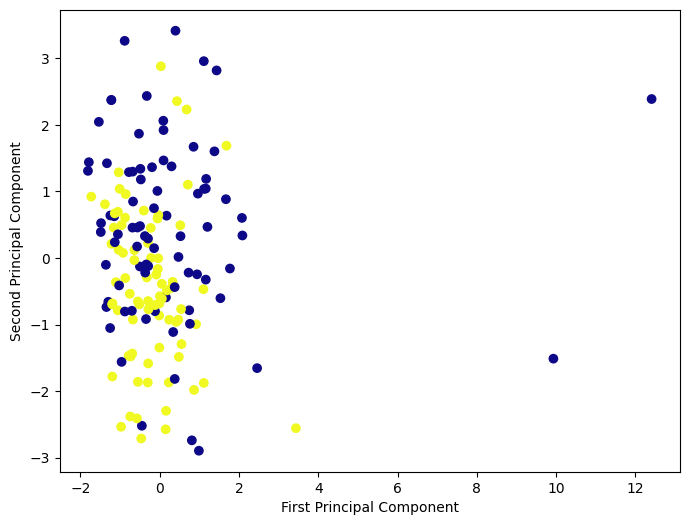

In [22]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=df_encoded['Status_Control'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [23]:
# components
pca.components_

array([[ 0.41491702,  0.51756387,  0.37617915, -0.25240034, -0.1726163 ,
        -0.1714526 , -0.08129048, -0.27371814, -0.28423564, -0.16102988,
        -0.2606926 , -0.19837219],
       [ 0.22466166,  0.07399442, -0.08140532, -0.18469597, -0.30189975,
         0.14652313,  0.42900297,  0.29142833,  0.36079016, -0.51664512,
        -0.10185702,  0.33802286],
       [ 0.41341445,  0.34372214,  0.14542989,  0.42696763,  0.23011261,
         0.20378272,  0.3601841 ,  0.16886256,  0.15584637,  0.30473286,
         0.33066285, -0.16816028],
       [-0.13122947,  0.00966786,  0.0942436 ,  0.02540423, -0.50670127,
        -0.52832851, -0.05115207,  0.14851248,  0.42857592,  0.09714655,
         0.24247847, -0.40087139]])

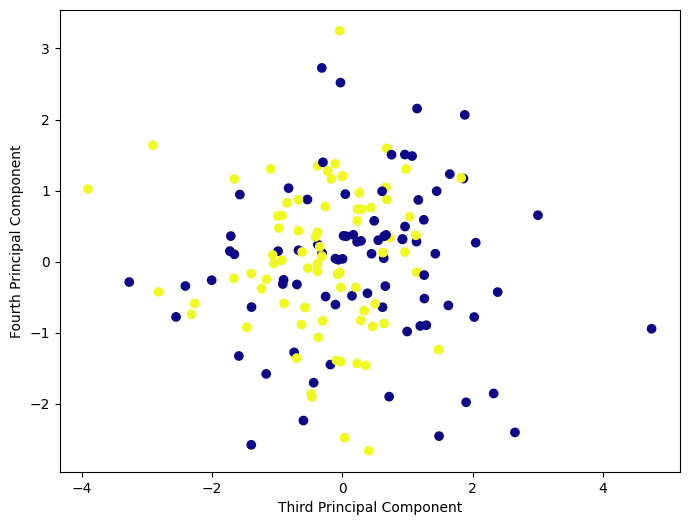

In [24]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 2], x_pca[:, 3],
            c=df_encoded['Status_Control'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('Third Principal Component')
plt.ylabel('Fourth Principal Component')
plt.show()

In the resulting scatter plot, each point represents a sample from the dataset, where the position of the point is determined by the first two principal components obtained from PCA. The color of the points reflects the value of the 'Status_Control' column, allowing visualization of how different values of this variable are distributed in the two-dimensional space defined by the principal components.

This visualization can provide insights into how the samples are grouped or separated based on the principal components, helping to understand the structure and relationship between the data after dimensionality reduction.

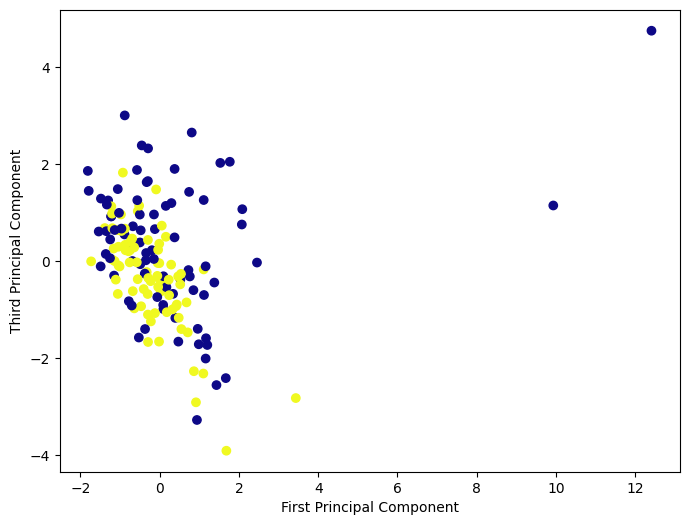

In [27]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 2],
            c=df_encoded['Status_Control'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.show()